In [241]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image 
from sklearn import preprocessing 
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 

from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import k_means,KMeans
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 


from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.preprocessing import OneHotEncoder,LabelEncoder
plt.style.use('ggplot')
pd.set_option('display.max_columns', 500) 

#For ignoring warning messages
import warnings
warnings.simplefilter("ignore")

In [242]:
Dataframe = pd.read_csv("WISCONSIN BREAST CANCER - ORIGINAL.csv",delimiter=",") 

In [243]:
df = Dataframe.copy()

In [244]:
df.head()

,id number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,"Class: (2 for benign, 4 for malignant)"
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [245]:
df.columns

Index(['id number', 'Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses', 'Class: (2 for benign, 4 for malignant)'],
      dtype='object')

In [246]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
id number                                 699 non-null int64
Clump Thickness                           699 non-null int64
Uniformity of Cell Size                   699 non-null int64
Uniformity of Cell Shape                  699 non-null int64
Marginal Adhesion                         699 non-null int64
Single Epithelial Cell Size               699 non-null int64
Bare Nuclei                               699 non-null object
Bland Chromatin                           699 non-null int64
Normal Nucleoli                           699 non-null int64
Mitoses                                   699 non-null int64
Class: (2 for benign, 4 for malignant)    699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


##### EDA process
- using panda profilling 

In [247]:
# from pandas_profiling import ProfileReport
# Report = ProfileReport(df)
# Report 

###### Data cleaning and pre-processing

In [248]:
df["Bare Nuclei"].value_counts()

1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

###### fixing the unknown value 

In [249]:
df["Bare Nuclei"].replace("?",method="ffill",inplace=True) 

In [250]:
df["Bare Nuclei"].astype(object).astype(int)

0       1
1      10
2       2
3       4
4       1
       ..
694     2
695     1
696     3
697     4
698     5
Name: Bare Nuclei, Length: 699, dtype: int32

In [251]:
df["Bare Nuclei"].value_counts() 

1     413
10    134
5      31
2      30
3      29
8      21
4      19
7       9
9       9
6       4
Name: Bare Nuclei, dtype: int64

In [252]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
id number                                 699 non-null int64
Clump Thickness                           699 non-null int64
Uniformity of Cell Size                   699 non-null int64
Uniformity of Cell Shape                  699 non-null int64
Marginal Adhesion                         699 non-null int64
Single Epithelial Cell Size               699 non-null int64
Bare Nuclei                               699 non-null object
Bland Chromatin                           699 non-null int64
Normal Nucleoli                           699 non-null int64
Mitoses                                   699 non-null int64
Class: (2 for benign, 4 for malignant)    699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


* Declaring Input Variable and Target from the data set

In [253]:
y = df["Class: (2 for benign, 4 for malignant)"]
X = df.drop(labels="Class: (2 for benign, 4 for malignant)",axis=1)

In [254]:
X.head()

,id number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,1000025,5,1,1,1,2,1,3,1,1
1,1002945,5,4,4,5,7,10,3,2,1
2,1015425,3,1,1,1,2,2,3,1,1
3,1016277,6,8,8,1,3,4,3,7,1
4,1017023,4,1,1,3,2,1,3,1,1


In [255]:
y

0      2
1      2
2      2
3      2
4      2
      ..
694    2
695    2
696    4
697    4
698    4
Name: Class: (2 for benign, 4 for malignant), Length: 699, dtype: int64

* Aim is to determine/ detecting breast cancer category 

##### Transforming the label class

In [256]:
from sklearn.preprocessing import LabelEncoder 

In [257]:
## Now, convert the target variable to numerical
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)

In [258]:
y

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,

##### Spliting of data into train and test data

In [259]:
from sklearn.model_selection import train_test_split

In [260]:
X_train,X_test, y_train,y_test = train_test_split(X,y, train_size=0.7, random_state=42)

In [261]:
print("X_train Shape: ", X_train.shape)
print("X_test Shape: ", X_test.shape)
print("y_train Shape: ", y_train.shape)
print("y_test Shape: ", y_test.shape)

X_train Shape:  (489, 10)
X_test Shape:  (210, 10)
y_train Shape:  (489,)
y_test Shape:  (210,)


#### Feature Engineering 
* using selectkbest to choose the most correlated variable to the target

In [262]:
from sklearn.feature_selection import chi2,SelectKBest,f_regression

In [263]:
def feature_selection(X_train,y_train,X_test):
    feature_selection = SelectKBest(score_func=f_regression,k="all")
    feature_selection.fit(x_train,y_train)
    x_train_fs = feature_selection.transform(x_train)
    x_test_fs = feature_selection.transform(x_test)
    return x_train_fs, x_test_fs, feature_selection

In [264]:
# example of correlation feature selection for numerical data
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from matplotlib import pyplot


# feature selection
def select_features(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=f_regression, k='all')
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

###### Vasualizationg of the best columns 
* Top 10 columns ranking

Feature 0: 3.851384
Feature 1: 468.801928
Feature 2: 954.870868
Feature 3: 1035.678639
Feature 4: 405.873990
Feature 5: 418.880350
Feature 6: 1030.556682
Feature 7: 680.849328
Feature 8: 485.763858
Feature 9: 97.817232


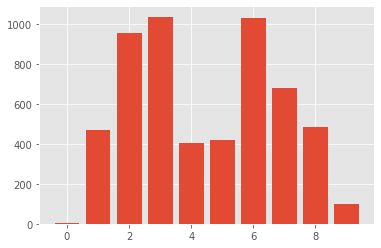

In [265]:
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i])) 
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

#### Feature Engineering
* chi2 method

In [266]:
from sklearn.feature_selection import chi2

In [267]:
Chi_score = chi2(X,y)

In [268]:
Chi_score

(array([1.59629102e+06, 6.42197052e+02, 1.38710620e+03, 1.28904071e+03,
        9.84413887e+02, 4.96108322e+02, 1.70374972e+03, 6.91078215e+02,
        1.15166443e+03, 2.31321784e+02]),
 array([0.00000000e+000, 1.11202421e-141, 1.33133728e-303, 2.72167722e-282,
        4.38683856e-216, 6.67924472e-110, 0.00000000e+000, 2.60508890e-152,
        1.95050546e-252, 3.06963760e-052]))

<AxesSubplot:>

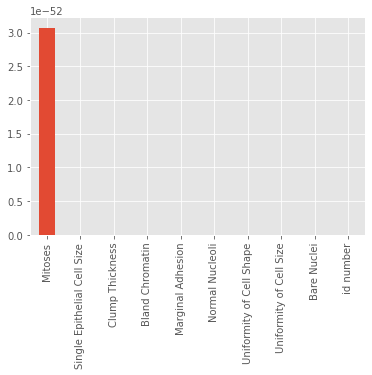

In [269]:
p_values = pd.Series(Chi_score[1],index = X.columns)
p_values.sort_values(ascending = False , inplace = True)
p_values.plot.bar()

###### New Data Variable 
* By dropping less revelance feature

In [270]:
X_var = X.drop(labels=["id number", "Mitoses"], axis=1)

In [271]:
X_var.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli
0,5,1,1,1,2,1,3,1
1,5,4,4,5,7,10,3,2
2,3,1,1,1,2,2,3,1
3,6,8,8,1,3,4,3,7
4,4,1,1,3,2,1,3,1


In [272]:
X_var.shape

(699, 8)

In [273]:
y

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,

* DATA VISUALIZATION

In [274]:
df.columns

Index(['id number', 'Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses', 'Class: (2 for benign, 4 for malignant)'],
      dtype='object')

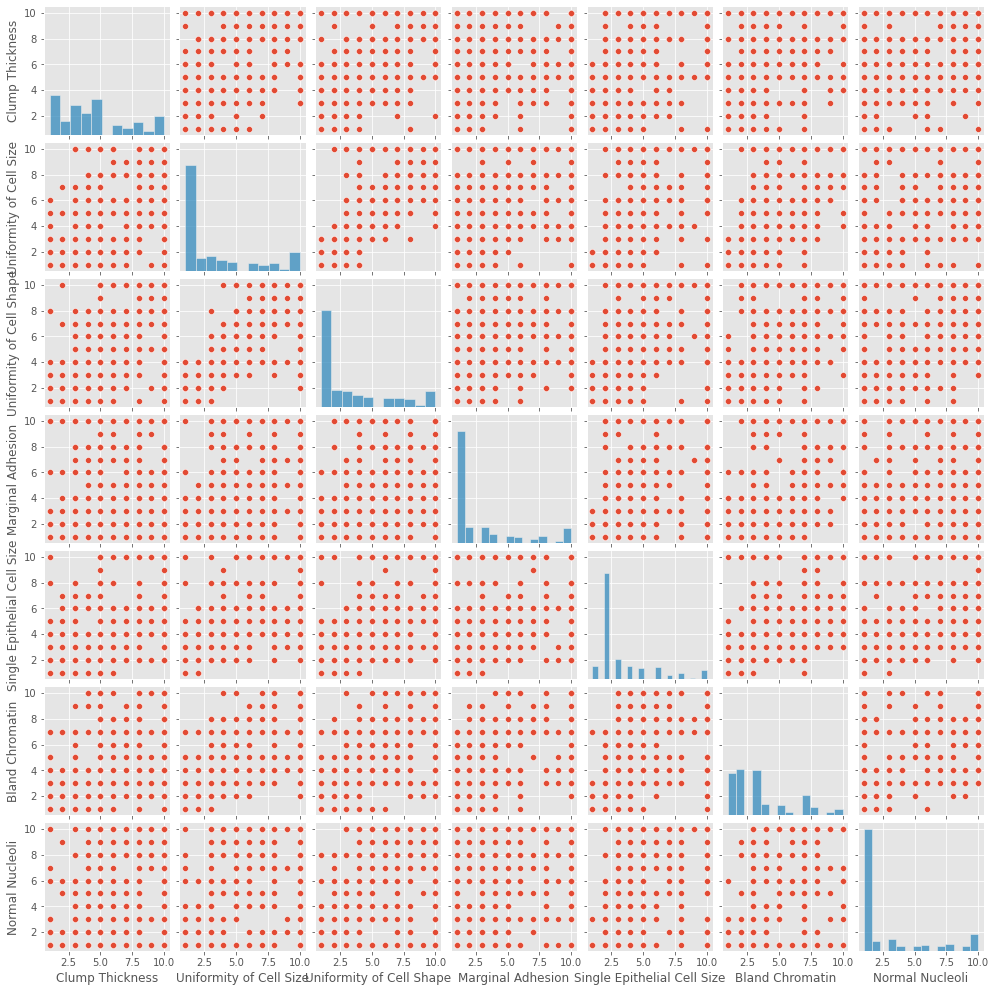

In [275]:
sns.pairplot(X_var,height=2) 

###### New Data for train and test
* Splitting the new variable of X into train and test

In [276]:
X_train_fs, X_test_fs, y_train_fs, y_test_fs = train_test_split(X_var,y, train_size=0.7, random_state=42)

In [277]:
print("X_train_fs Shape: ", X_train_fs.shape)
print("X_test_fs Shape: ", X_test_fs.shape)
print("y_train_fs Shape: ", y_train_fs.shape)
print("y_test_fs Shape: ", y_test_fs.shape)

X_train_fs Shape:  (489, 8)
X_test_fs Shape:  (210, 8)
y_train_fs Shape:  (489,)
y_test_fs Shape:  (210,)


###### Data sampling and resampling 
* Generate more artificial data from smote library

In [278]:
from imblearn.over_sampling import SMOTE

In [279]:
oversample = SMOTE(random_state=42)
X_new, y_new = oversample.fit_resample(X_var,y)

In [280]:
print("Shape of X before sampling :", X_var.shape)
print("Shape of y before sampling :", y.shape)
print("Shape of X after sampling :", X_new.shape)
print("Shape of X before sampling :", y_new.shape)

Shape of X before sampling : (699, 8)
Shape of y before sampling : (699,)
Shape of X after sampling : (916, 8)
Shape of X before sampling : (916,)


* Spliting the SMOTE sample data into train and test 

In [281]:
X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X_new, y_new, train_size=0.7, random_state=42)

In [282]:
print("Shape of X_new_train :", X_new_train.shape)
print("Shape of X_new_test :", X_new_test.shape)
print("Shape of y_new_train :", y_new_train.shape)
print("Shape of y_new_test :", y_new_test.shape)

Shape of X_new_train : (641, 8)
Shape of X_new_test : (275, 8)
Shape of y_new_train : (641,)
Shape of y_new_test : (275,)


##### MODEL 1 - Deploying model using J48 Decision Tree 
* Before Data Augmentation

In [104]:
%%time 
# Before Data Augmentation
# Decision tree with depth = 4
model_dt = DecisionTreeClassifier(random_state=42,max_depth=4)
model_dt.fit(X_train_fs, y_train_fs)
model_dt_score_train = model_dt.score(X_train_fs, y_train_fs)
print("Training score: ",model_dt_score_train)
model_dt_score_test = model_dt.score(X_test_fs, y_test_fs)
print("Testing score: ",model_dt_score_test)

Training score:  0.9775051124744376
Testing score:  0.9571428571428572
Wall time: 16 ms


* Decision with Hyperparameters using GridSearch CV

In [105]:
#Custom GridSearch Parameters

decisionT_params = {
                'criterion':['gini','entropy'],
                'min_samples_split': range(1,10),
                'max_depth':range(1,10), 
                'min_samples_leaf':range(1,5)
                    }

In [106]:
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), decisionT_params, verbose=1, cv=5)

In [107]:
#Fitting all the GridSearch parameters combinations to X_train and y_train
grid_search_cv.fit(X_train_fs, y_train_fs)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(1, 10)},
             verbose=1)

In [108]:
## Best estimator of the J48 decision tree
grid_search_cv.best_estimator_

DecisionTreeClassifier(max_depth=5, random_state=42)

In [109]:
%%time 
model_dt = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=2,
                       random_state=42,min_samples_split=6)
model_dt.fit(X_train_fs, y_train_fs)
model_dt_score_train = model_dt.score(X_train_fs, y_train_fs)
print("Training score: ",model_dt_score_train)
model_dt_score_test = model_dt.score(X_test_fs, y_test_fs)
print("Testing score: ",model_dt_score_test)

Training score:  0.9734151329243353
Testing score:  0.9428571428571428
Wall time: 16 ms


In [110]:
#Predicting the y_pred using model object

y_pred_dt = model_dt.predict_proba(X_test_fs)[:, 1]

* Visualization

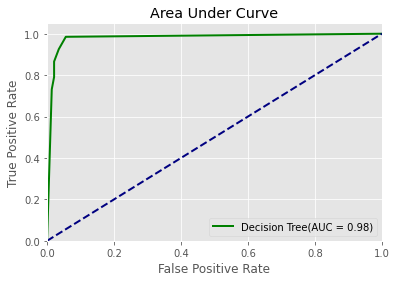

In [111]:
fpr_dt, tpr_dt, _ = roc_curve(y_test_fs, y_pred_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)
plt.figure(1)
lw = 2
plt.plot(fpr_dt, tpr_dt, color='green',
         lw=lw, label='Decision Tree(AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

In [112]:
###############################################################
##                                                           ##
##    This function prints and plots the confusion matrix.   ##
##                                                           ##
###############################################################

import itertools
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(model, normalize=False): 
    cm = confusion_matrix(y_test, model, labels=[0, 1])
    classes=["Benign 0", "Malignant Clas 1"]
    cmap = plt.cm.Blues
    title = "Confusion Matrix"
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=3)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

* Confusion Matrix

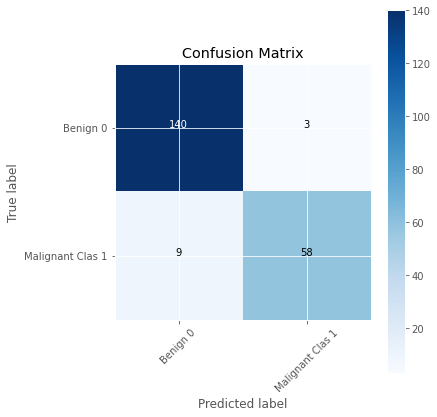

In [113]:
predictions = model_dt.predict(X_test_fs)
plt.figure(figsize=(6,6))
plot_confusion_matrix(predictions,normalize=False)
plt.show()

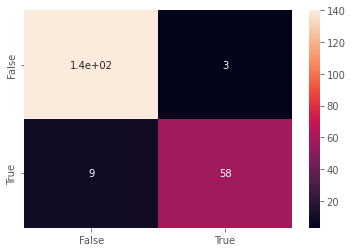

In [114]:
mat = confusion_matrix(y_test,predictions)
ax = sns.heatmap(mat,annot=True)
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

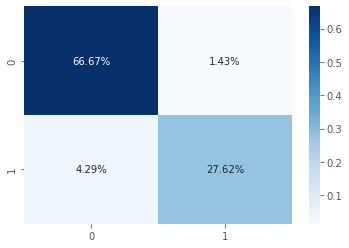

In [115]:
ax = sns.heatmap(mat/np.sum(mat), annot=True,fmt='.2%', cmap='Blues')

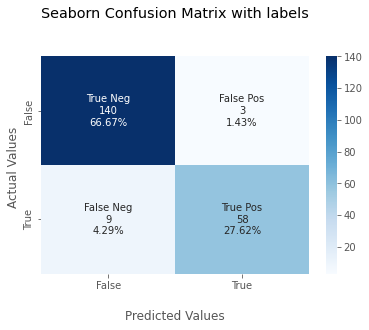

In [116]:
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                mat.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     mat.flatten()/np.sum(mat)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(mat, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [117]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test_fs, predictions), ": is the confusion matrix")
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test_fs, predictions), ": is the accuracy score")
from sklearn.metrics import precision_score
print(precision_score(y_test_fs, predictions), ": is the precision score")
from sklearn.metrics import recall_score
print(recall_score(y_test_fs, predictions), ": is the recall score")
from sklearn.metrics import f1_score
print(f1_score(y_test_fs, predictions), ": is the f1 score")

[[140   3]
 [  9  58]] : is the confusion matrix
0.9428571428571428 : is the accuracy score
0.9508196721311475 : is the precision score
0.8656716417910447 : is the recall score
0.9062499999999999 : is the f1 score


* After data Augmentation

In [118]:
%%time
# After Data Augmentation
# Decision tree with depth = 4
model_dt = DecisionTreeClassifier(random_state=42,max_depth=4)
model_dt.fit(X_new_train, y_new_train)
model_dt_score_train = model_dt.score(X_new_train, y_new_train)
print("Training score: ",model_dt_score_train)
model_dt_score_test = model_dt.score(X_new_test, y_new_test)
print("Testing score: ",model_dt_score_test)

Training score:  0.9781591263650546
Testing score:  0.9454545454545454
Wall time: 16 ms


* Decision with Hyperparameters using GridSearch CV

In [119]:
decisionT_params = {
                'criterion':['gini','entropy'],
                'min_samples_split': range(1,10),
                'max_depth':range(1,10), 
                'min_samples_leaf':range(1,5)
                    }

In [120]:
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), decisionT_params, verbose=1, cv=5)

In [121]:
#Fitting all the GridSearch parameters combinations to X_train and y_train
grid_search_cv.fit(X_new_train, y_new_train)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(1, 10)},
             verbose=1)

In [122]:
## Best estimator of the J48 decision tree
grid_search_cv.best_estimator_

DecisionTreeClassifier(max_depth=4, min_samples_split=3, random_state=42)

In [123]:
%%time 
model_dt = DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=3,
                       random_state=42,min_samples_split=6)
model_dt.fit(X_new_train, y_new_train)
model_dt_score_train = model_dt.score(X_new_train, y_new_train)
print("Training score: ",model_dt_score_train)
model_dt_score_test = model_dt.score(X_new_test, y_new_test)
print("Testing score: ",model_dt_score_test)

Training score:  0.9765990639625585
Testing score:  0.9563636363636364
Wall time: 16 ms


In [124]:
#Predicting the y_pred using model object

y_pred_dt = model_dt.predict_proba(X_new_test)[:, 1]

* Visualization

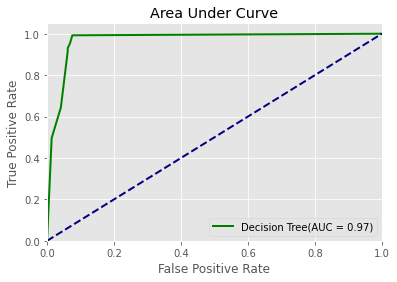

In [125]:
fpr_dt, tpr_dt, _ = roc_curve(y_new_test, y_pred_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)
plt.figure(1)
lw = 2
plt.plot(fpr_dt, tpr_dt, color='green',
         lw=lw, label='Decision Tree(AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

In [126]:
###############################################################
##                                                           ##
##    This function prints and plots the confusion matrix.   ##
##                                                           ##
###############################################################

import itertools
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(model, normalize=False): 
    cm = confusion_matrix(y_new_test, model, labels=[0, 1])
    classes=["Benign Clas 0", "Malignant Clas 1"]
    cmap = plt.cm.Blues
    title = "Confusion Matrix"
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=3)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

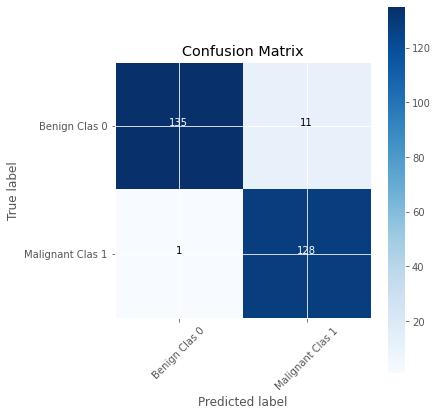

In [127]:
predictions = model_dt.predict(X_new_test)
plt.figure(figsize=(6,6))
plot_confusion_matrix(predictions, normalize=False)
plt.show()

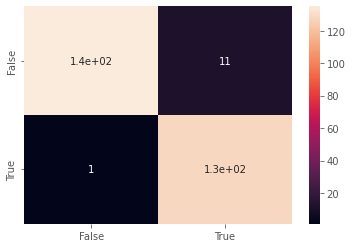

In [128]:
mat = confusion_matrix(y_new_test,predictions)
ax = sns.heatmap(mat,annot=True)
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

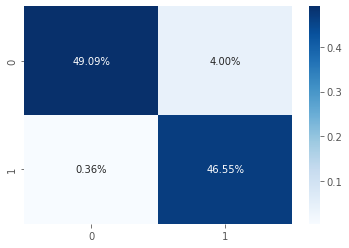

In [129]:
ax = sns.heatmap(mat/np.sum(mat), annot=True,fmt='.2%', cmap='Blues')

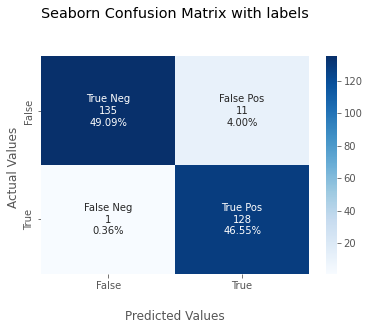

In [130]:
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                mat.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     mat.flatten()/np.sum(mat)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(mat, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [132]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_new_test, predictions), ": is the confusion matrix")
from sklearn.metrics import accuracy_score
print(accuracy_score(y_new_test, predictions), ": is the accuracy score")
from sklearn.metrics import precision_score
print(precision_score(y_new_test, predictions), ": is the precision score")
from sklearn.metrics import recall_score
print(recall_score(y_new_test, predictions), ": is the recall score")
from sklearn.metrics import f1_score
print(f1_score(y_new_test, predictions), ": is the f1 score") 

[[135  11]
 [  1 128]] : is the confusion matrix
0.9563636363636364 : is the accuracy score
0.920863309352518 : is the precision score
0.9922480620155039 : is the recall score
0.9552238805970149 : is the f1 score


###### Model 2: Random Forest Classifier
* Before Data Augmentation
- Using Default parameter of the random forest

In [170]:
fit_rf = RandomForestClassifier(random_state=97,criterion='entropy', max_depth=5,n_estimators=15,) 

In [171]:
%%time
model_dt = fit_rf 
model_dt.fit(X_train_fs, y_train_fs)
model_dt_score_train = model_dt.score(X_train_fs, y_train_fs)
print("Training score: ",model_dt_score_train)
model_dt_score_test = model_dt.score(X_test_fs, y_test_fs)
print("Testing score: ",model_dt_score_test) 

Training score:  0.9795501022494888
Testing score:  0.9761904761904762
Wall time: 159 ms


* Random Forest with GridSearch CV

In [172]:
np.random.seed(42)
start = time.time()

param_dist = {'max_depth': range(1,6),
              'bootstrap': [True, False],
              'max_features': ['auto', 'sqrt', 'log2', None],
              'criterion': ['gini', 'entropy']}

cv_rf = GridSearchCV(fit_rf, cv = 10,
                     param_grid=param_dist, 
                     n_jobs = 3)

cv_rf.fit(X_train_fs, y_train_fs)
print('Best Parameters using grid search: \n', cv_rf.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

Best Parameters using grid search: 
 {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 2, 'max_features': 'auto'}
Time taken in grid search:  18.55


In [173]:
# Set best parameters given by grid search 
fit_rf.set_params(criterion = 'entropy',
                  max_features = 'auto', 
                  max_depth = 2,
                 bootstrap = True) 

RandomForestClassifier(criterion='entropy', max_depth=2, n_estimators=15,
                       random_state=97)

In [174]:
fit_rf.set_params(warm_start=True, 
                  oob_score=True)

min_estimators = 15
max_estimators = 1000

error_rate = {}

for i in range(min_estimators, max_estimators + 1):
    fit_rf.set_params(n_estimators=i)
    fit_rf.fit(X_train_fs, y_train_fs)

    oob_error = 1 - fit_rf.oob_score_
    error_rate[i] = oob_error

In [175]:
# Convert dictionary to a pandas series for easy plotting 
oob_series = pd.Series(error_rate)

Wall time: 80 ms


Text(0.5, 1.0, 'OOB Error Rate Across various Forest sizes \n(From 15 to 1000 trees)')

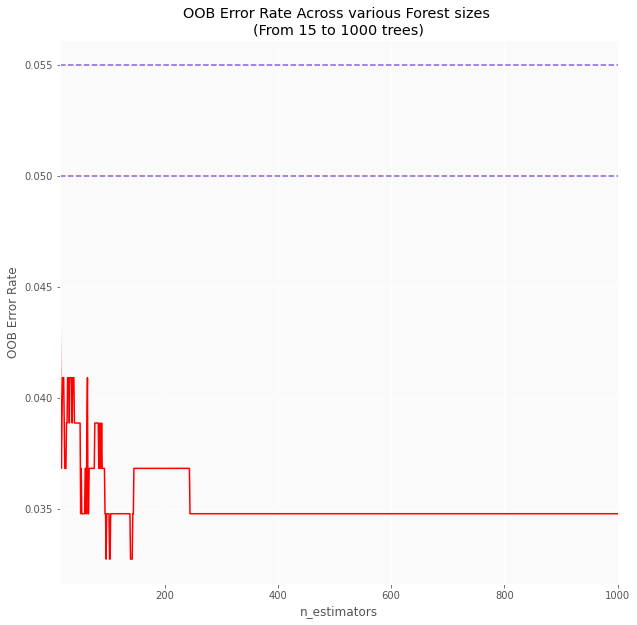

In [176]:
%%time
fig, ax = plt.subplots(figsize=(10, 10))

ax.set_facecolor('#fafafa')

oob_series.plot(kind='line',color = 'red')
plt.axhline(0.055, color='#875FDB',linestyle='--')
plt.axhline(0.05, color='#875FDB',linestyle='--')
plt.xlabel('n_estimators')
plt.ylabel('OOB Error Rate')
plt.title('OOB Error Rate Across various Forest sizes \n(From 15 to 1000 trees)')

In [177]:
print('OOB Error rate for 400 trees is: {0:.5f}'.format(oob_series[600]))

OOB Error rate for 400 trees is: 0.03476


In [178]:
# Refine the tree via OOB Output
fit_rf.set_params(n_estimators=100,
                  bootstrap = True,
                  warm_start=False, 
                  oob_score=False)

RandomForestClassifier(criterion='entropy', max_depth=2, random_state=97)

In [179]:
fit_rf.fit(X_train_fs, y_train_fs)

RandomForestClassifier(criterion='entropy', max_depth=2, random_state=97)

In [180]:
predictions_rf = fit_rf.predict(X_test_fs)

#### Printing confusion matrix for Random Forest Classifier

In [181]:
###############################################################
##                                                           ##
##    This function prints and plots the confusion matrix.   ##
##                                                           ##
###############################################################

import itertools
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(model, normalize=False): 
    cm = confusion_matrix(y_test_fs, model, labels=[0, 1])
    classes=["Benign Clas 0", "Malignant Clas 1"]
    cmap = plt.cm.Blues
    title = "Confusion Matrix"
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=3)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

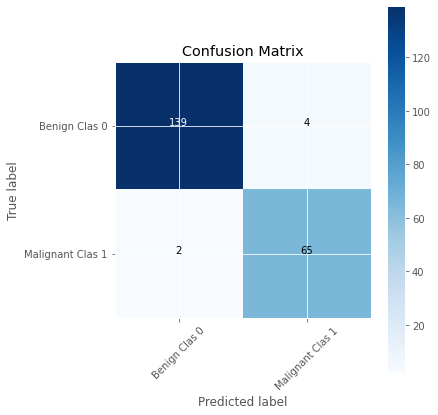

In [182]:
predictions = fit_rf.predict(X_test_fs)
plt.figure(figsize=(6,6))
plot_confusion_matrix(predictions, normalize=False)
plt.show()

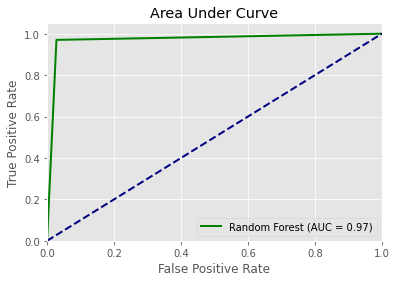

In [183]:
### Area Under the curve
fpr_dt, tpr_dt, _ = roc_curve(y_test_fs,predictions)
roc_auc_dt = auc(fpr_dt, tpr_dt)
plt.figure(1)
lw = 2
plt.plot(fpr_dt, tpr_dt, color='green',
         lw=lw, label='Random Forest (AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

<AxesSubplot:>

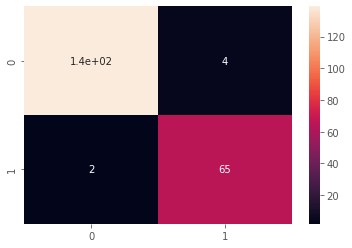

In [184]:
mat = confusion_matrix(y_test_fs, predictions, normalize=None)
sns.heatmap(mat,annot=True)

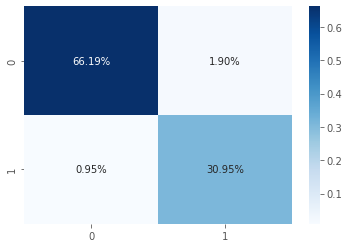

In [185]:
ax = sns.heatmap(mat/np.sum(mat), annot=True,fmt='.2%', cmap='Blues')

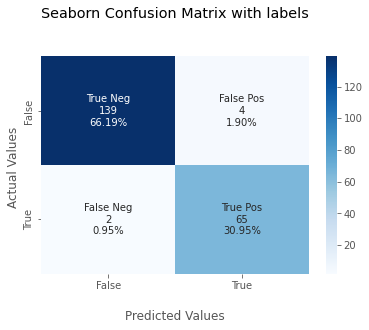

In [186]:
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                mat.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     mat.flatten()/np.sum(mat)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(mat, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [188]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test_fs, predictions_rf), ": is the confusion matrix")
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test_fs, predictions_rf), ": is the accuracy score")
from sklearn.metrics import precision_score
print(precision_score(y_test_fs, predictions_rf), ": is the precision score")
from sklearn.metrics import recall_score
print(recall_score(y_test_fs, predictions_rf), ": is the recall score")
from sklearn.metrics import f1_score
print(f1_score(y_test_fs, predictions_rf), ": is the f1 score") 

[[139   4]
 [  2  65]] : is the confusion matrix
0.9714285714285714 : is the accuracy score
0.9420289855072463 : is the precision score
0.9701492537313433 : is the recall score
0.9558823529411764 : is the f1 score


* After Data Augmentation

In [152]:
fit_rf = RandomForestClassifier(random_state=97,criterion='entropy', max_depth=5,n_estimators=15,) 

In [153]:
%%time
model_dt = fit_rf 
model_dt.fit(X_new_train, y_new_train)
model_dt_score_train = model_dt.score(X_new_train, y_new_train)
print("Training score: ",model_dt_score_train)
model_dt_score_test = model_dt.score(X_new_test, y_new_test)
print("Testing score: ",model_dt_score_test) 

Training score:  0.9859594383775351
Testing score:  0.9745454545454545
Wall time: 60.9 ms


* Random Forest with GridSearch CV

In [154]:
np.random.seed(42)
start = time.time()

param_dist = {'max_depth': range(1,6),
              'bootstrap': [True, False],
              'max_features': ['auto', 'sqrt', 'log2', None],
              'criterion': ['gini', 'entropy']}

cv_rf = GridSearchCV(fit_rf, cv = 10,
                     param_grid=param_dist, 
                     n_jobs = 3)

cv_rf.fit(X_new_train, y_new_train)
print('Best Parameters using grid search: \n', cv_rf.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

Best Parameters using grid search: 
 {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 4, 'max_features': 'auto'}
Time taken in grid search:  16.53


In [155]:
# Set best parameters given by grid search 
fit_rf.set_params(criterion = 'entropy',
                  max_features = 'auto', 
                  max_depth = 4,
                 bootstrap = True)

RandomForestClassifier(criterion='entropy', max_depth=4, n_estimators=15,
                       random_state=97)

In [156]:
fit_rf.set_params(warm_start=True, 
                  oob_score=True)

min_estimators = 15
max_estimators = 1000

error_rate = {}

for i in range(min_estimators, max_estimators + 1):
    fit_rf.set_params(n_estimators=i)
    fit_rf.fit(X_new_train, y_new_train)

    oob_error = 1 - fit_rf.oob_score_
    error_rate[i] = oob_error

In [157]:
# Convert dictionary to a pandas series for easy plotting 
oob_series = pd.Series(error_rate)

Wall time: 61 ms


Text(0.5, 1.0, 'OOB Error Rate Across various Forest sizes \n(From 15 to 1000 trees)')

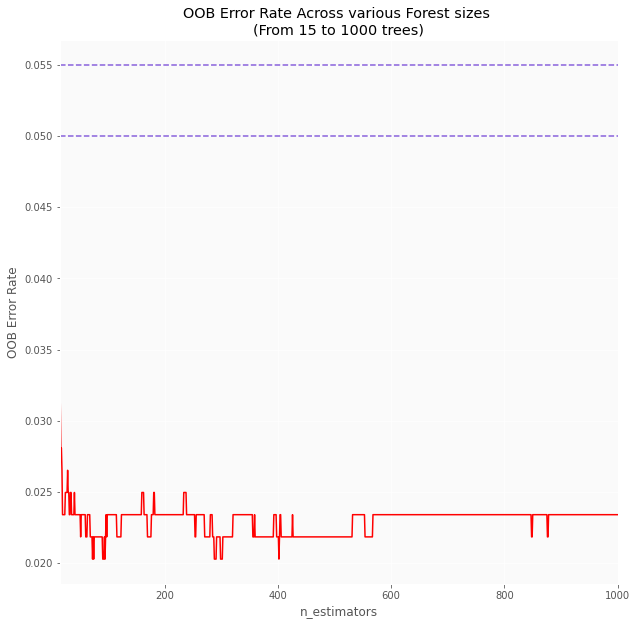

In [158]:
%%time
fig, ax = plt.subplots(figsize=(10, 10))

ax.set_facecolor('#fafafa')

oob_series.plot(kind='line',color = 'red')
plt.axhline(0.055, color='#875FDB',linestyle='--')
plt.axhline(0.05, color='#875FDB',linestyle='--')
plt.xlabel('n_estimators')
plt.ylabel('OOB Error Rate')
plt.title('OOB Error Rate Across various Forest sizes \n(From 15 to 1000 trees)')

In [159]:
print('OOB Error rate for 400 trees is: {0:.5f}'.format(oob_series[600]))

OOB Error rate for 400 trees is: 0.02340


In [160]:
# Refine the tree via OOB Output
fit_rf.set_params(n_estimators=100,
                  bootstrap = True,
                  warm_start=False, 
                  oob_score=False)

RandomForestClassifier(criterion='entropy', max_depth=4, random_state=97)

In [161]:
fit_rf.fit(X_new_train, y_new_train)

RandomForestClassifier(criterion='entropy', max_depth=4, random_state=97)

In [162]:
predictions_rf = fit_rf.predict(X_new_test)

#### Printing confusion matrix for Random Forest Classifier

In [163]:
###############################################################
##                                                           ##
##    This function prints and plots the confusion matrix.   ##
##                                                           ##
###############################################################

import itertools
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix_Dat(model, normalize=False): 
    cm = confusion_matrix(y_new_test, model, labels=[0, 1])
    classes=["Experimental Clas 0", "Experimental Clas 1"]
    cmap = plt.cm.Blues
    title = "Confusion Matrix"
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=3)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

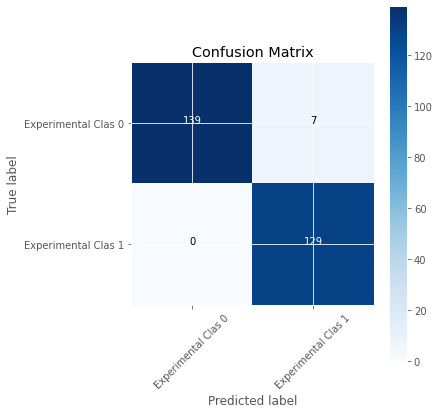

In [164]:
predictions = fit_rf.predict(X_new_test)
plt.figure(figsize=(6,6))
plot_confusion_matrix_Dat(predictions, normalize=False)
plt.show()

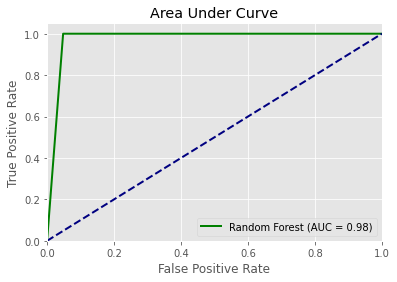

In [165]:
### Area Under the curve
fpr_dt, tpr_dt, _ = roc_curve(y_new_test,predictions)
roc_auc_dt = auc(fpr_dt, tpr_dt)
plt.figure(1)
lw = 2
plt.plot(fpr_dt, tpr_dt, color='green',
         lw=lw, label='Random Forest (AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

<AxesSubplot:>

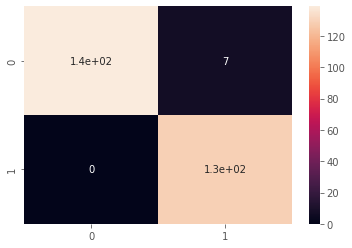

In [166]:
mat = confusion_matrix(y_new_test, predictions, normalize=None)
sns.heatmap(mat,annot=True)

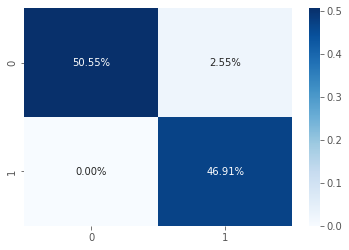

In [167]:
ax = sns.heatmap(mat/np.sum(mat), annot=True,fmt='.2%', cmap='Blues')

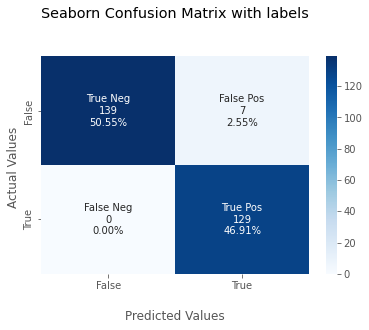

In [168]:
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                mat.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     mat.flatten()/np.sum(mat)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(mat, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [169]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_new_test, predictions_rf), ": is the confusion matrix")
from sklearn.metrics import accuracy_score
print(accuracy_score(y_new_test, predictions_rf), ": is the accuracy score")
from sklearn.metrics import precision_score
print(precision_score(y_new_test, predictions_rf), ": is the precision score")
from sklearn.metrics import recall_score
print(recall_score(y_new_test, predictions_rf), ": is the recall score")
from sklearn.metrics import f1_score
print(f1_score(y_new_test, predictions_rf), ": is the f1 score") 

[[139   7]
 [  0 129]] : is the confusion matrix
0.9745454545454545 : is the accuracy score
0.9485294117647058 : is the precision score
1.0 : is the recall score
0.9735849056603774 : is the f1 score


##### Model 3: Naive Bayes
* Before Data Augmentation
- Modelling using Bayes with default parameters

In [149]:
import sklearn
from sklearn.metrics import accuracy_score

In [197]:
%%time
# Init the Gaussian Classifier
model = GaussianNB()

# Train the model
model.fit(X_train_fs, y_train_fs)
# Predict Output 
pred = model.predict(X_test_fs) 
print("Accuracy:",accuracy_score(pred,y_test_fs))

Accuracy: 0.9619047619047619
Wall time: 9 ms


[]

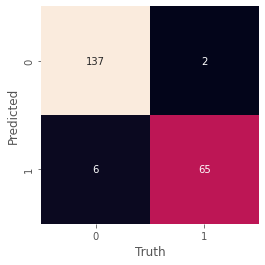

In [198]:
# Plot Confusion Matrix
# plt.figure(figsize=(10,8))
mat = confusion_matrix(pred, y_test_fs)
names = np.unique(pred)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=names, yticklabels=names)
plt.xlabel('Truth')
plt.ylabel('Predicted')
plt.plot()

#### Applying Gausian Naive Bayes using GridSearchCV/

In [199]:
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

In [200]:
%%time
nb_classifier = GaussianNB()

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=nb_classifier, 
                 param_grid=params_NB, 
                 cv=4,   # use any cross validation technique 
                 verbose=1, 
                 scoring='accuracy') 
gs_NB.fit(X_train_fs, y_train_fs)
gs_NB.best_params_ 

Fitting 4 folds for each of 100 candidates, totalling 400 fits
Wall time: 2.79 s


{'var_smoothing': 0.12328467394420659}

In [201]:
y_pred = gs_NB.predict(X_test_fs)

In [202]:
%%time
# Decision tree with depth = 4
model_nb_score_train = gs_NB.score(X_train_fs, y_train_fs)
print("Training score: ",model_nb_score_train)
model_nb_score_test = gs_NB.score(X_test_fs, y_test_fs)
print("Testing score: ",model_nb_score_test)

Training score:  0.9631901840490797
Testing score:  0.9619047619047619
Wall time: 11 ms


In [203]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test_fs, y_pred), ": is the confusion matrix")
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test_fs, y_pred), ": is the accuracy score")
from sklearn.metrics import precision_score
print(precision_score(y_test_fs, y_pred), ": is the precision score")
from sklearn.metrics import recall_score
print(recall_score(y_test_fs, y_pred), ": is the recall score")
from sklearn.metrics import f1_score
print(f1_score(y_test_fs, y_pred), ": is the f1 score")

[[139   4]
 [  4  63]] : is the confusion matrix
0.9619047619047619 : is the accuracy score
0.9402985074626866 : is the precision score
0.9402985074626866 : is the recall score
0.9402985074626865 : is the f1 score


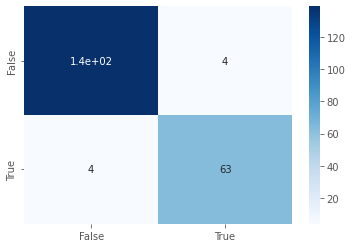

In [204]:
ax= sns.heatmap(confusion_matrix(y_test_fs, y_pred),annot=True,cmap="Blues")
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

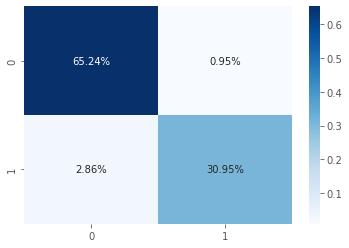

In [205]:
ax = sns.heatmap(mat/np.sum(mat), annot=True,fmt='.2%', cmap='Blues')

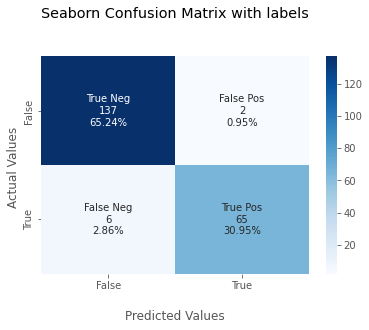

In [206]:
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                mat.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     mat.flatten()/np.sum(mat)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(mat, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

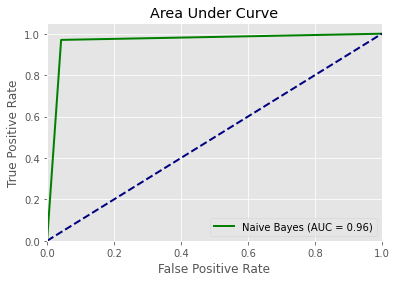

In [207]:
### Area Under the curve
fpr_dt, tpr_dt, _ = roc_curve(y_test_fs,pred)
roc_auc_dt = auc(fpr_dt, tpr_dt)
plt.figure(1)
lw = 2
plt.plot(fpr_dt, tpr_dt, color='green',
         lw=lw, label='Naive Bayes (AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

* After Data Augmentation

In [208]:
%%time
# Init the Gaussian Classifier
model = GaussianNB()

# Train the model
model.fit(X_new_train, y_new_train)
# Predict Output 
pred = model.predict(X_new_test)

Wall time: 8.99 ms


[]

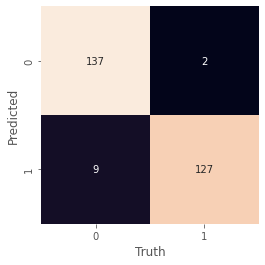

In [209]:
# Plot Confusion Matrix
# plt.figure(figsize=(10,8))
mat = confusion_matrix(pred, y_new_test)
names = np.unique(pred)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=names, yticklabels=names)
plt.xlabel('Truth')
plt.ylabel('Predicted')
plt.plot()

#### Applying Gausian Naive Bayes using GridSearchCV/

In [210]:
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

In [211]:
%%time
nb_classifier = GaussianNB()

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=nb_classifier, 
                 param_grid=params_NB, 
                 cv=4,   # use any cross validation technique 
                 verbose=1, 
                 scoring='accuracy') 
gs_NB.fit(X_new_train, y_new_train)
gs_NB.best_params_ 

Fitting 4 folds for each of 100 candidates, totalling 400 fits
Wall time: 2.78 s


{'var_smoothing': 0.004328761281083057}

In [212]:
y_pred = gs_NB.predict(X_new_test)

In [213]:
%%time
# Decision tree with depth = 4
model_nb_score_train = gs_NB.score(X_new_train, y_new_train)
print("Training score: ",model_nb_score_train)
model_nb_score_test = gs_NB.score(X_new_test, y_new_test)
print("Testing score: ",model_nb_score_test)

Training score:  0.9641185647425897
Testing score:  0.96
Wall time: 7.97 ms


In [214]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_new_test, y_pred), ": is the confusion matrix")
from sklearn.metrics import accuracy_score
print(accuracy_score(y_new_test, y_pred), ": is the accuracy score")
from sklearn.metrics import precision_score
print(precision_score(y_new_test, y_pred), ": is the precision score")
from sklearn.metrics import recall_score
print(recall_score(y_new_test, y_pred), ": is the recall score")
from sklearn.metrics import f1_score
print(f1_score(y_new_test, y_pred), ": is the f1 score")

[[137   9]
 [  2 127]] : is the confusion matrix
0.96 : is the accuracy score
0.9338235294117647 : is the precision score
0.9844961240310077 : is the recall score
0.9584905660377359 : is the f1 score


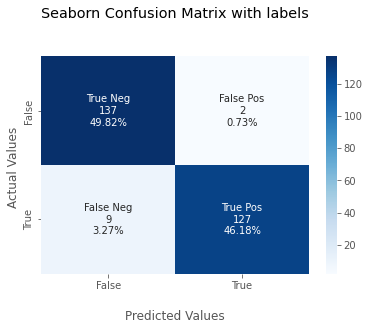

In [215]:
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                mat.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     mat.flatten()/np.sum(mat)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(mat, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

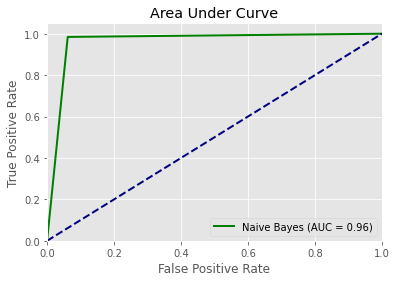

In [216]:
### Area Under the curve
fpr_dt, tpr_dt, _ = roc_curve(y_new_test,pred)
roc_auc_dt = auc(fpr_dt, tpr_dt)
plt.figure(1)
lw = 2
plt.plot(fpr_dt, tpr_dt, color='green',
         lw=lw, label='Naive Bayes (AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

##### Model 4: USING Neural Network (Shallow and Deep Network)
* Before Data Augementation

In [213]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.layers import LeakyReLU
import tensorflow as tf

In [214]:
#Function for Shallo Neural Network
def create_model_shallow(optimizer="adam"):
    # create model
    model = Sequential()
    model.add(Dense(200,activation='relu',input_shape=(8,))) # input layer
    model.add(Dropout(0.2))
    model.add(Dense(50, activation='relu')) #Have only one hidden layer
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid')) # Since it has 2 outputs, 'sigmoid' as activation in the output layer
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer=optimizer,metrics=["accuracy"])
    return model
shallow_model = create_model_shallow() 

In [215]:
#Function for Deep Neural Network
def create_model(optimizer="adam"):
    # create model
    model = Sequential()
    model.add(Dense(200,activation='relu',input_shape=(8,)))
    model.add(Dropout(0.2))
    model.add(Dense(50, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(50, activation='sigmoid')) 
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid')) # Since it has 2 hidden layers, 'sigmoid' as activation in the output layer
    # Compile model 
    model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),metrics=["accuracy"])
    return model
model = create_model() 

In [216]:
import tensorflow as tf
#Considering y variable holds numpy array
# y_train_fs = tf.convert_to_tensor(y_train_fs, dtype=np.int64) 
# X_train_fs = tf.convert_to_tensor(X_train_fs, dtype=np.int64)
# X_test_fs = tf.convert_to_tensor(X_test_fs, dtype=np.int64)
# y_test_fs = tf.convert_to_tensor(y_test_fs, dtype=np.int64)

In [289]:
import tensorflow as tf
#Considering y variable holds numpy array
y_train_fs = np.asarray(y_train_fs).astype(int)
X_train_fs = np.array(X_train_fs).astype(int)
X_test_fs = np.array(X_test_fs).astype(int)
y_test_fs = np.array(y_test_fs).astype(int)

In [290]:
X_train_fs.shape

(489, 8)

In [291]:
import tensorflow as tf
#Considering y variable holds numpy array
y_new_train = np.asarray(y_new_train).astype("float32")
y_new_test = np.asarray(y_new_test).astype("float32")
X_new_train = np.asarray(X_new_train).astype("float32")
X_new_test = np.asarray(X_new_test).astype("float32")

###### Before Data Augmentation
- Shallow Network

In [292]:
#Applying Shallow NN model object to trainind data
shallow_train=shallow_model.fit(X_train_fs, y_train_fs, epochs=100, batch_size=100, verbose=0,validation_data=(X_test_fs,y_test_fs))

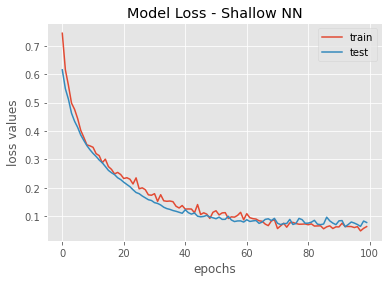

In [293]:
# plot loss during training
plt.plot(shallow_train.history['loss'], label='train')
plt.plot(shallow_train.history['val_loss'], label='test')
plt.title('Model Loss - Shallow NN')
plt.xlabel('epochs')
plt.ylabel('loss values')
plt.legend(loc='upper right')
plt.show()

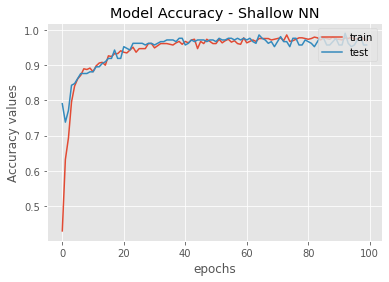

In [294]:
# plot accuracy during training
plt.plot(shallow_train.history['accuracy'], label='train')
plt.plot(shallow_train.history['val_accuracy'], label='test')
plt.title('Model Accuracy - Shallow NN')
plt.xlabel('epochs')
plt.ylabel('Accuracy values')
plt.legend(loc='upper right')
plt.show()

In [295]:
#Accuracy for Shallow Neural Network
train_acc = shallow_model.evaluate(X_train_fs, y_train_fs, verbose=0)
test_acc = shallow_model.evaluate(X_test_fs, y_test_fs, verbose=0)

print("Training score: ",round(train_acc[1]*100,2))
print("Testing score: ",round(test_acc[1]*100,2)) 

Training score:  98.36
Testing score:  95.71


In [296]:
# loss for shallow Neural Network 
train_loss = shallow_model.evaluate(X_train_fs, y_train_fs, verbose=1)
test_loss = shallow_model.evaluate(X_test_fs, y_test_fs, verbose=1)

print("Training loss: ",round(train_loss[0]*100,2))
print("Testing loss: ",round(test_loss[0]*100,2)) 

7/7 [==============================] - 0s 2ms/step - loss: 0.0777 - accuracy: 0.9571
Training loss:  3.91
Testing loss:  7.77


###### Deep Network
- Before Data Augmentation 

In [297]:
#Applying DEEP NN model object to trainind data
train=model.fit(X_train_fs, y_train_fs, epochs=100, batch_size=100, verbose=0,validation_data=(X_test_fs,y_test_fs))

###### plot loss during training
plt.plot(train.history['loss'], label='train')
plt.plot(train.history['val_loss'], label='test')
plt.title('Model Loss - Deep NN')
plt.xlabel('epochs')
plt.ylabel('loss values')
plt.legend(loc='upper right')
plt.show()

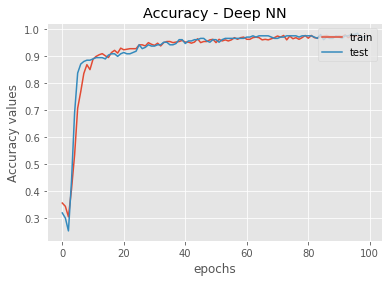

In [299]:
# plot Accuracy during training
plt.plot(train.history['accuracy'], label='train')
plt.plot(train.history['val_accuracy'], label='test')
plt.title('Accuracy - Deep NN')
plt.xlabel('epochs')
plt.ylabel('Accuracy values')
plt.legend(loc='upper right')
plt.show()

In [300]:
#Accuracy for Deep Neural Network
train_acc = model.evaluate(X_train_fs, y_train_fs, verbose=0)
test_acc = model.evaluate(X_test_fs, y_test_fs, verbose=0)

print("Training score: ",round(train_acc[1]*100,2))
print("Testing score: ",round(test_acc[1]*100,2)) 

Training score:  97.34
Testing score:  97.62


In [301]:
#Accuracy for Deep Neural Network
train_loss = model.evaluate(X_train_fs, y_train_fs, verbose=1)
test_loss = model.evaluate(X_test_fs, y_test_fs, verbose=1)

print("Training loss: ",round(train_loss[0]*100,2))
print("Testing loss: ",round(test_loss[0]*100,2)) 

7/7 [==============================] - 0s 2ms/step - loss: 0.0709 - accuracy: 0.9762
Training loss:  7.54
Testing loss:  7.09


### Applying GridSearchCV for Neural Network

In [302]:
# Grid Search Cross Validation
# GridSearch Cross Validation Parameters
param_grid = {
   
    'epochs': [50,100,150,200],
    'batch_size':[16,32,100,128],
    'optimizer':['RMSprop', 'Adam','SGD',"nadam"],
    
}

# create model

# Creating Model Object with KerasClassifier
model_cv = KerasClassifier(build_fn=create_model, verbose=0)


grid = GridSearchCV(estimator=model_cv,  
                    n_jobs=-1, 
                    verbose=1,
                    cv=5,
                    param_grid=param_grid)

grid_cv_model = grid.fit(X_train_fs, y_train_fs,) # Fitting the GridSearch Object on the Train Set


means = grid_cv_model.cv_results_['mean_test_score'] # Mean of test scores
stds = grid_cv_model.cv_results_['std_test_score'] # standard deviations of test scores
params = grid_cv_model.cv_results_['params'] # parameters used
# to print all scores, standard deviations and parameters used
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

# Printing the Best Parameters as a Result of Grid Search Cross Validation on the Screen
print("Best: %f using %s" % (grid_cv_model.best_score_, grid_cv_model.best_params_))

Fitting 5 folds for each of 64 candidates, totalling 320 fits
0.963160 (0.016671) with: {'batch_size': 16, 'epochs': 50, 'optimizer': 'RMSprop'}
0.940690 (0.017572) with: {'batch_size': 16, 'epochs': 50, 'optimizer': 'Adam'}
0.946834 (0.025318) with: {'batch_size': 16, 'epochs': 50, 'optimizer': 'SGD'}
0.959057 (0.022472) with: {'batch_size': 16, 'epochs': 50, 'optimizer': 'nadam'}
0.952935 (0.016690) with: {'batch_size': 16, 'epochs': 100, 'optimizer': 'RMSprop'}
0.942731 (0.015308) with: {'batch_size': 16, 'epochs': 100, 'optimizer': 'Adam'}
0.952935 (0.022064) with: {'batch_size': 16, 'epochs': 100, 'optimizer': 'SGD'}
0.944793 (0.013812) with: {'batch_size': 16, 'epochs': 100, 'optimizer': 'nadam'}
0.944772 (0.015325) with: {'batch_size': 16, 'epochs': 150, 'optimizer': 'RMSprop'}
0.948832 (0.026723) with: {'batch_size': 16, 'epochs': 150, 'optimizer': 'Adam'}
0.942752 (0.021952) with: {'batch_size': 16, 'epochs': 150, 'optimizer': 'SGD'}
0.952935 (0.012394) with: {'batch_size': 16

In [303]:
# %% Model Tuning- Building a Tuned Model with Best Parameters
# Creating Tuned Model Object with KerasClassifier
cv_model = grid_cv_model.best_estimator_

In [304]:
#%% K-FOLD
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# K-fold accuracy scores

kfold = KFold(n_splits=5, shuffle=True)
results = cross_val_score(cv_model, X_test_fs, y_test_fs, cv=kfold,scoring= 'accuracy')

In [305]:
print('K-fold Cross Validation Accuracy Results: ', results)
print('K-fold Cross Validation Accuracy Results Mean: ', results.mean())

K-fold Cross Validation Accuracy Results:  [0.85714286 1.         0.85714286 0.92857143 0.97619048]
K-fold Cross Validation Accuracy Results Mean:  0.9238095238095239


In [306]:
# Tuned Model Prediction

y_pred = cv_model.predict(X_test_fs)

In [307]:
import sklearn.metrics as metrics
print("f1_weighted:",metrics.f1_score(y_test_fs, y_pred,average='weighted'))
# %% Accuracy
print("accuracy:",metrics.accuracy_score(y_test_fs, y_pred))

f1_weighted: 0.9615814070986486
accuracy: 0.9619047619047619


In [308]:
# Classification Report
model_report = classification_report(y_test_fs, y_pred)
print(model_report)

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       143
           1       0.97      0.91      0.94        67

    accuracy                           0.96       210
   macro avg       0.96      0.95      0.96       210
weighted avg       0.96      0.96      0.96       210



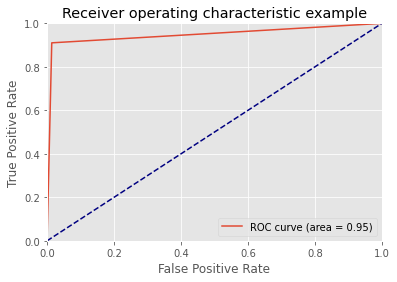

In [309]:
#%% ROC-AUC Curve
import matplotlib.pyplot as plt

probs=cv_model.predict_proba(X_test_fs)
fpr,tpr,threshold=metrics.roc_curve(y_test_fs,y_pred)
roc_auc=metrics.auc(fpr,tpr)

plt.title("ROC")
plt.plot(fpr,tpr,label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

###### After Data Augmentation
- Shallow learning 

In [310]:
#Applying Shallow NN model object to trainind data
shallow_train=shallow_model.fit(X_new_train,y_new_train, epochs=100, batch_size=100, verbose=0,validation_data=(X_new_test,y_new_test))

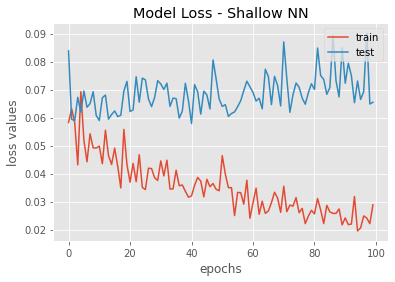

In [311]:
# plot loss during training
plt.plot(shallow_train.history['loss'], label='train')
plt.plot(shallow_train.history['val_loss'], label='test')
plt.title('Model Loss - Shallow NN')
plt.xlabel('epochs')
plt.ylabel('loss values')
plt.legend(loc='upper right')
plt.show()

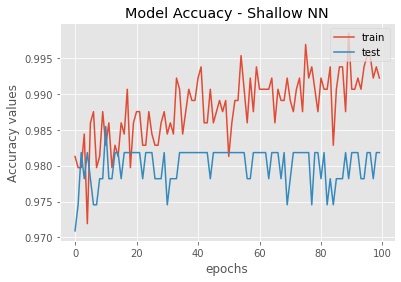

In [312]:
# plot accuracy during training
plt.plot(shallow_train.history['accuracy'], label='train')
plt.plot(shallow_train.history['val_accuracy'], label='test')
plt.title('Model Accuacy - Shallow NN')
plt.xlabel('epochs')
plt.ylabel('Accuracy values')
plt.legend(loc='upper right')
plt.show()

In [313]:
#Accuracy for Shallow Neural Network
train_acc = shallow_model.evaluate(X_new_train, y_new_train, verbose=1)
test_acc = shallow_model.evaluate(X_new_test, y_new_test, verbose=1)

print("Training score: ",round(train_acc[1]*100,2))
print("Testing score: ",round(test_acc[1]*100,2)) 

9/9 [==============================] - 0s 2ms/step - loss: 0.0655 - accuracy: 0.9818
Training score:  99.84
Testing score:  98.18


In [314]:
# loss for shallow Neural Network 
train_loss = shallow_model.evaluate(X_new_train, y_new_train, verbose=1)
test_loss = shallow_model.evaluate(X_new_test, y_new_test, verbose=1)

print("Training loss: ",round(train_loss[0]*100,2)) 
print("Testing loss: ",round(test_loss[0]*100,2)) 

9/9 [==============================] - 0s 2ms/step - loss: 0.0655 - accuracy: 0.9818
Training loss:  1.06
Testing loss:  6.55


* Deep Learning 

In [315]:
#Applying DEEP NN model object to trainind data
train=model.fit(X_new_train, y_new_train, epochs=100, batch_size=100, verbose=0,validation_data=(X_new_test,y_new_test))

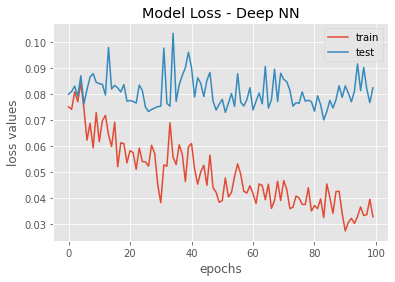

In [316]:
# plot loss during training
plt.plot(train.history['loss'], label='train')
plt.plot(train.history['val_loss'], label='test')
plt.title('Model Loss - Deep NN')
plt.xlabel('epochs')
plt.ylabel('loss values')
plt.legend(loc='upper right')
plt.show()

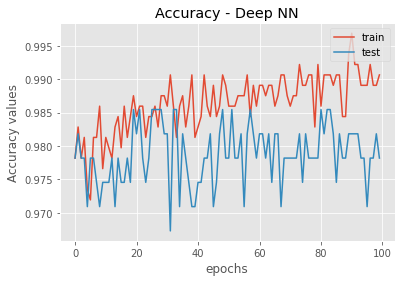

In [317]:
# plot Accuracy during training
plt.plot(train.history['accuracy'], label='train')
plt.plot(train.history['val_accuracy'], label='test')
plt.title('Accuracy - Deep NN')
plt.xlabel('epochs')
plt.ylabel('Accuracy values')
plt.legend(loc='upper right')
plt.show()

In [318]:
#Accuracy for Deep Neural Network
train_acc = model.evaluate(X_new_train, y_new_train, verbose=1)
test_acc = model.evaluate(X_new_test, y_new_test, verbose=1)

print("Training score: ",round(train_acc[1]*100,2))
print("Testing score: ",round(test_acc[1]*100,2)) 

9/9 [==============================] - 0s 2ms/step - loss: 0.0825 - accuracy: 0.9782
Training score:  99.38
Testing score:  97.82


In [319]:
#Accuracy for Deep Neural Network
train_loss = model.evaluate(X_new_train, y_new_train, verbose=1)
test_loss = model.evaluate(X_new_test, y_new_test, verbose=1)

print("Training loss: ",round(train_loss[0]*100,2))
print("Testing loss: ",round(test_loss[0]*100,2))

9/9 [==============================] - 0s 3ms/step - loss: 0.0825 - accuracy: 0.9782
Training loss:  2.15
Testing loss:  8.25


In [320]:
# Grid Search Cross Validation
# GridSearch Cross Validation Parameters
param_grid = {
   
    'epochs': [50,100,150,200],
    'batch_size':[16,32,100,128],
    'optimizer':['RMSprop', 'Adam','SGD',"nadam"],
    
}

# create model

# Creating Model Object with KerasClassifier
model_cv = KerasClassifier(build_fn=create_model, verbose=0)


grid = GridSearchCV(estimator=model_cv,  
                    n_jobs=-1, 
                    verbose=1,
                    cv=5,
                    param_grid=param_grid)

grid_cv_model = grid.fit(X_new_train, y_new_train,) # Fitting the GridSearch Object on the Train Set


means = grid_cv_model.cv_results_['mean_test_score'] # Mean of test scores
stds = grid_cv_model.cv_results_['std_test_score'] # standard deviations of test scores
params = grid_cv_model.cv_results_['params'] # parameters used
# to print all scores, standard deviations and parameters used
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

# Printing the Best Parameters as a Result of Grid Search Cross Validation on the Screen
print("Best: %f using %s" % (grid_cv_model.best_score_, grid_cv_model.best_params_))

Fitting 5 folds for each of 64 candidates, totalling 320 fits
0.962536 (0.007721) with: {'batch_size': 16, 'epochs': 50, 'optimizer': 'RMSprop'}
0.971899 (0.018896) with: {'batch_size': 16, 'epochs': 50, 'optimizer': 'Adam'}
0.971899 (0.012718) with: {'batch_size': 16, 'epochs': 50, 'optimizer': 'SGD'}
0.970349 (0.015949) with: {'batch_size': 16, 'epochs': 50, 'optimizer': 'nadam'}
0.959460 (0.019951) with: {'batch_size': 16, 'epochs': 100, 'optimizer': 'RMSprop'}
0.964123 (0.017529) with: {'batch_size': 16, 'epochs': 100, 'optimizer': 'Adam'}
0.956335 (0.023451) with: {'batch_size': 16, 'epochs': 100, 'optimizer': 'SGD'}
0.962573 (0.015105) with: {'batch_size': 16, 'epochs': 100, 'optimizer': 'nadam'}
0.954772 (0.015097) with: {'batch_size': 16, 'epochs': 150, 'optimizer': 'RMSprop'}
0.964111 (0.016842) with: {'batch_size': 16, 'epochs': 150, 'optimizer': 'Adam'}
0.959460 (0.015071) with: {'batch_size': 16, 'epochs': 150, 'optimizer': 'SGD'}
0.964111 (0.016101) with: {'batch_size': 16

In [321]:
# %% Model Tuning- Building a Tuned Model with Best Parameters
# Creating Tuned Model Object with KerasClassifier
cv_model = grid_cv_model.best_estimator_

In [322]:
#%% K-FOLD
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# K-fold accuracy scores

kfold = KFold(n_splits=5, shuffle=True)
results = cross_val_score(cv_model, X_new_test, y_new_test, cv=kfold,scoring= 'accuracy')

In [323]:
print('K-fold Cross Validation Accuracy Results: ', results)
print('K-fold Cross Validation Accuracy Results Mean: ', results.mean())

K-fold Cross Validation Accuracy Results:  [0.94545455 0.94545455 1.         0.94545455 0.98181818]
K-fold Cross Validation Accuracy Results Mean:  0.9636363636363635


In [324]:
# Tuned Model Prediction

y_pred = cv_model.predict(X_new_test)

In [325]:
import sklearn.metrics as metrics
print("f1_weighted:",metrics.f1_score(y_new_test, y_pred,average='weighted'))
# %% Accuracy
print("accuracy:",metrics.accuracy_score(y_new_test, y_pred))

f1_weighted: 0.9709345200254291
accuracy: 0.9709090909090909


In [326]:
# Classification Report
model_report = classification_report(y_new_test, y_pred)
print(model_report)

              precision    recall  f1-score   support

         0.0       0.99      0.95      0.97       146
         1.0       0.95      0.99      0.97       129

    accuracy                           0.97       275
   macro avg       0.97      0.97      0.97       275
weighted avg       0.97      0.97      0.97       275



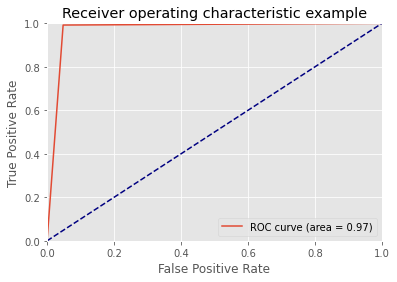

In [327]:
#%% ROC-AUC Curve
import matplotlib.pyplot as plt

probs=cv_model.predict_proba(X_new_test)
fpr,tpr,threshold=metrics.roc_curve(y_new_test,y_pred)
roc_auc=metrics.auc(fpr,tpr)

plt.title("ROC")
plt.plot(fpr,tpr,label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()